# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
!pip -vvv install prettytable

from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("Etiqueta correcta")
    plt.xlabel("Etiqueta predicha")

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-build-tracker-1hc429uj
Initialized build tracking at /tmp/pip-build-tracker-1hc429uj
Created build tracker: /tmp/pip-build-tracker-1hc429uj
Entered build tracker: /tmp/pip-build-tracker-1hc429uj
Created temporary directory: /tmp/pip-install-_m7nfv3k
Created temporary directory: /tmp/pip-ephem-wheel-cache-knnjwld9
Created temporary directory: /tmp/pip-unpack-v6mkf1uo
Removed build tracker: '/tmp/pip-build-tracker-1hc429uj'


## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/cittamiguel/loans_data/main/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea
**No hace falta escribir código para responder estas preguntas.**

In [ ]:
dataset.describe()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.166667,19111.758360,76316.051780,107321.088457,8.900216,0.187702,0.319849,180.300783,1.128910,21.857066,34.573408
std,0.372779,11000.345961,46227.026585,56039.685066,7.552677,0.704882,0.928452,84.838308,1.664555,9.510840,9.308794
min,0.000000,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,48984.750000,70787.250000,3.000000,0.000000,0.000000,116.970718,0.000000,16.000000,29.427210
50%,0.000000,17000.000000,67201.000000,94198.000000,7.000000,0.000000,0.000000,174.967815,1.000000,21.000000,35.363407
75%,0.000000,23900.000000,93731.500000,122976.250000,13.000000,0.000000,0.000000,232.261800,2.000000,27.000000,39.357987
max,1.000000,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001




1.   **¿De qué se trata el conjunto de datos?**

  El departamento de 'Crédito del consumidor' de un banco quiere automatizar el proceso de decisión para la aprobacion de una línea de crédito. Para esto, siguen las recomendaciones del acta 'Equal Credit Opportunity' para crear un modelo empírico y estadístico para evaluar los creditos. El modelo será construido a partir de la información recolectada sobre la viabilidad de créditos previamentente otorgados.

  En el data set se encuentran registradas 1854 entradas sobre el rendimiento del préstamo y en la variable objetivo se indica si el aplicante logro pagar su prestamo o si este se encuentra en deuda.


2.   **¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**

  El data set tiene una variable objetivo binaria, la cual clasifica si el cliente no ha pagado su préstamo (1) o si lo a hecho (0).


3.   **¿Qué información (atributos) hay disponible para hacer la predicción?**

  **Atributos**
  - `TARGET` 1 = incumplió con el prestado - 0 = préstamo liquidado
  - `LOAN` Valor del préstamo solicitado
  - `MORTDUE` Valor de la hipoteca actual
  - `VALUE` Valor de la propiedad actual
  - `YOJ` Años en el trabajo actual
  - `DEROG` Número de reportes de auditorias
  - `DELINQ` Número de créditos adeudados
  - `CLAGE` Meses de la linea comercial mas antigua
  - `NINQ` Números de creditos recientes
  - `CLNO` Números de creditos
  - `DEBTINC` Deuda-a-ingreso ratio


4.   **¿Qué atributos imagina ud. que son los más determinantes para la predicción?**

  El DEBTINC puede que sea el atributo más relevante, ya que en sí misma es una medida de capacidad de pago. DELINQ también puede llegar a ser de mucha utilidad, ya que nos da un indicio del riesgo asociado a ese individuo. Otros atributos puede que no sean tan relevantes por sí solos. Por ejemplo, el valor de la propiedad actual (VALUE) puede no ser relevante, ya que alguien que perdió su empleo puede tener una propiedad bien valuada pero no estar en condiciones de afrontar un pago. El Valor del préstamo solicitado (LOAN) no debiera ser significativo si no se lo compara con el flujo de ingresos de ese individuo.





In [ ]:
X

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...
1849,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Podemos observar que todas las predicciones del modelo son 0.

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Utilizando la matriz de confusion, podemos ver que la cantidad de TP es 0, esto se debe a que todas las predicciones son 0. Sólo se registran True y False Negatives.

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'TN = {tn}')
print(f'FN = {fn}')
print(f'TP = {tp}')
print(f'FP = {fp}')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

TN = 313
FN = 58
TP = 0
FP = 0
Confusion matrix:
[[313   0]
 [ 58   0]]


Por lo tanto las métricas de precision, recall son 0 tambien porque dependen de TP. La metrica F1 se calcula basandose en precision y recall, por lo que tambien es 0.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8436657681940701
0.0
0.0
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Podemos ver los mismos datos utilizando el reporte de clasificacion de sklearn con el label 1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        58

   micro avg       0.00      0.00      0.00        58
   macro avg       0.00      0.00      0.00        58
weighted avg       0.00      0.00      0.00        58



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

Obetenemos todos los parámetros de nuestro modelo:

In [ ]:
param_dict_2_2 = {
    'loss': ['hinge','log_loss', 'squared_hinge', 'squared_error'],
    'alpha': [0.001, 0.01, 0.1, 1.0, 2, 10, 50, 100],
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'],
}
model_2_2 = SGDClassifier(random_state=0)

Lo entrenamos:

In [ ]:
grid_search = GridSearchCV(model_2_2, param_dict_2_2, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 2, 10, 50, 100],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log_loss', 'squared_hinge',
                                  'squared_error'],
                         'penalty': ['l2', 'l1', 'elasticnet', None]})

Veamos que nuestro modelo tiene una prediccion muy optimista en la que todos pagarian sus creditos, recordemos que el 0 hace referencia a clientes que pagaron sus creditos

In [ ]:
best_classifier = grid_search.best_estimator_
y_pred_2_2 = best_classifier.predict(X_test)
y_pred_2_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Veamos que precision obtenemos con el resultado de la busqueda de parametros y veamos que parametros resultaron ser los mejores.

In [ ]:
test_accuracy = best_classifier.score(X_test, y_test)
print(grid_search.best_params_)
print("Test accuracy:", test_accuracy)


{'alpha': 10, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}
Test accuracy: 0.8436657681940701


Nuestro modelo ha resultado muy optimista y a 58 casos con valor 1 (morosos) les ha asignado un 0.

TN = 313
FN = 58
TP = 0
FP = 0
Confusion matrix:


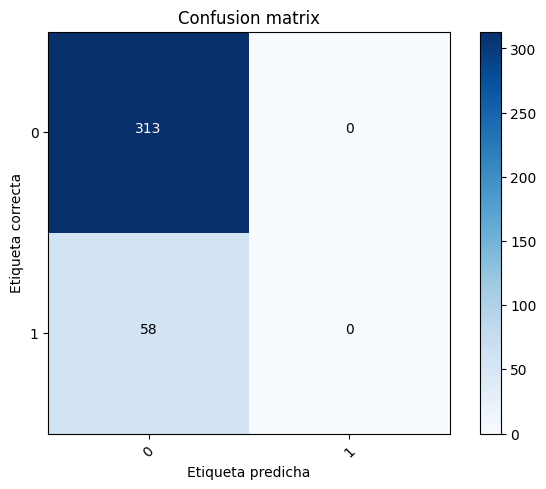

In [ ]:
tn2_2, fp2_2, fn2_2, tp2_2 = confusion_matrix(y_test, y_pred_2_2).ravel()
print(f'TN = {tn2_2}')
print(f'FN = {fn2_2}')
print(f'TP = {tp2_2}')
print(f'FP = {fp2_2}')
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred_2_2)
plot_confusion_matrix(cm, ['0', '1'])

Aun siendo tan optimista tenemos una accuraccy de %84

In [ ]:
print(accuracy_score(y_test, y_pred_2_2))
print(precision_score(y_test, y_pred_2_2))
print(recall_score(y_test, y_pred_2_2))
print(f1_score(y_test, y_pred_2_2))

0.8436657681940701
0.0
0.0
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_pred_2_2, labels=[1]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        58

   micro avg       0.00      0.00      0.00        58
   macro avg       0.00      0.00      0.00        58
weighted avg       0.00      0.00      0.00        58



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.88


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

class Report:
  def __init__(self, y_true, y_predict):
    self.y_true = y_true
    self.y_predict = y_predict
    self.accuracy = accuracy_score(y_true, y_predict)
    self.f1 = f1_score(y_true, y_predict)
    self.recall = recall_score(y_true, y_predict)
    self.conf_matrix = confusion_matrix(y_true, y_predict)
    self.precision = precision_score(y_true, y_predict)

train = Report(y_train, y_train_pred)
test = Report(y_test, y_test_pred)

from prettytable import PrettyTable

sumary_table = PrettyTable()
sumary_table.field_names = ['Conjunto', 'Accuracy', 'Precision', 'Recall', 'F1']
sumary_table.add_row(['Entrenamiento', train.accuracy, train.precision, train.recall, train.f1])
sumary_table.add_row(['Evaluacion', test.accuracy, test.precision, test.recall, test.f1])

print(sumary_table)

+---------------+--------------------+--------------------+--------------------+--------------------+
|    Conjunto   |      Accuracy      |     Precision      |       Recall       |         F1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
| Entrenamiento |        1.0         |        1.0         |        1.0         |        1.0         |
|   Evaluacion  | 0.8814016172506739 | 0.6166666666666667 | 0.6379310344827587 | 0.6271186440677966 |
+---------------+--------------------+--------------------+--------------------+--------------------+


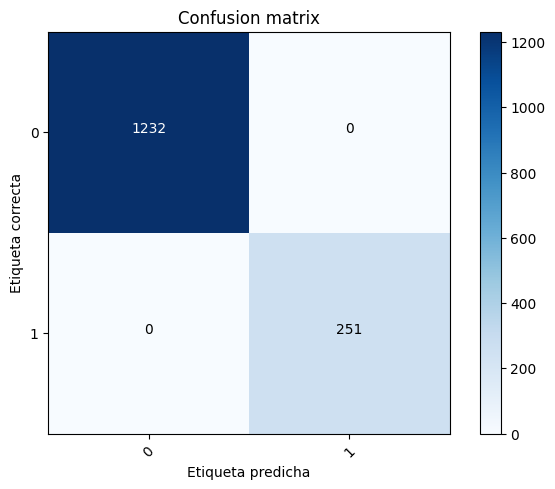

In [ ]:
plot_confusion_matrix(train.conf_matrix, ['0', '1'])

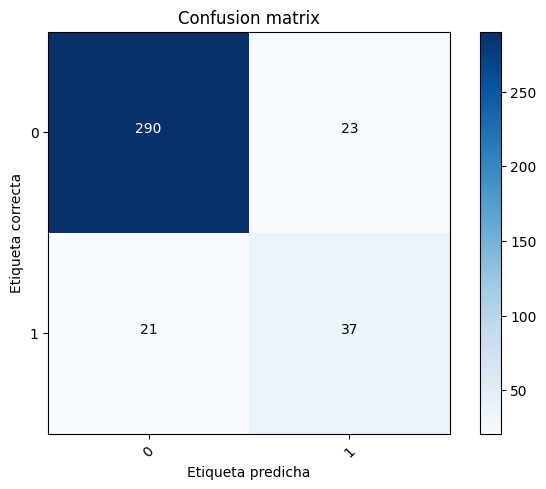

In [ ]:
plot_confusion_matrix(test.conf_matrix, ['0', '1'])

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
X

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...
1849,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(random_state=0)
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [*range(5,16)],
    'min_samples_split' : [*range(5,11)]
}

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5, return_train_score=True)
cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy')

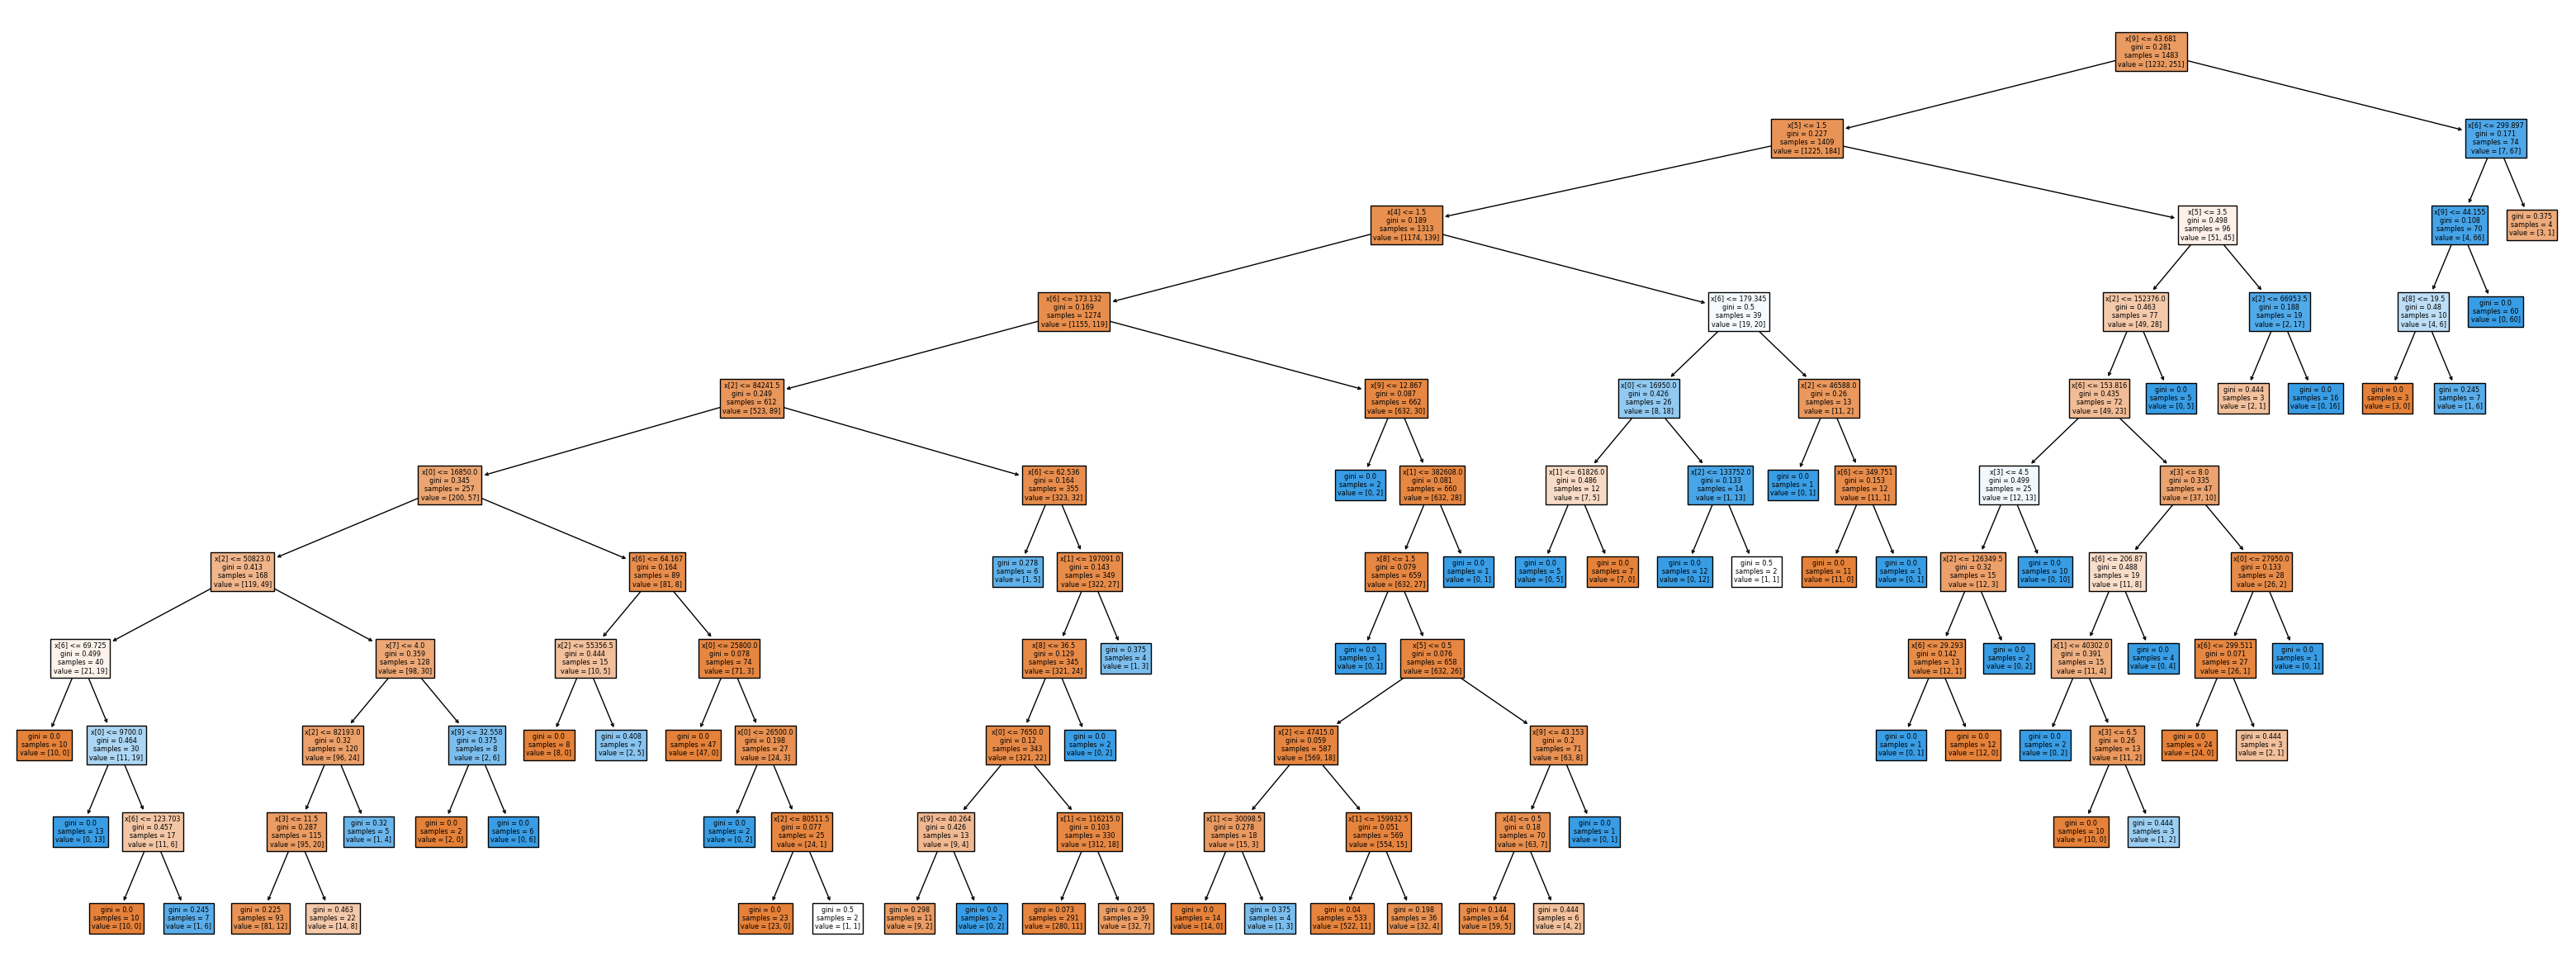

In [ ]:
tree = cv.best_estimator_
results = cv.cv_results_

def plot_results(results:str):
  params = results['params']
  mean = results['mean_test_score']
  std = results['std_test_score']
  rank = results['rank_test_score']

  print("crit.\tdepth\t| mean\tstd\trank")
  for p, m, s, r in zip(params, mean, std, rank):
      print(f"{p['criterion']}\t{p['max_depth']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

plt.figure(figsize=(40,15))
plot_tree(tree, filled=True)
plt.show()

In [ ]:
print(cv.best_params_)
#plot_results(results)
df_results = pd.DataFrame(results)
df_results[['param_criterion', 'param_min_samples_split',  'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']]

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 8}


,param_criterion,param_min_samples_split,param_max_depth,mean_test_score,std_test_score,rank_test_score
0,gini,5,5,0.873237,0.015424,46
1,gini,6,5,0.873237,0.015424,46
2,gini,7,5,0.873237,0.015424,46
3,gini,8,5,0.872563,0.015090,55
4,gini,9,5,0.871888,0.013939,64
...,...,...,...,...,...,...
193,log_loss,6,15,0.860429,0.015058,162
194,log_loss,7,15,0.855717,0.018111,183
195,log_loss,8,15,0.861097,0.015220,158
196,log_loss,9,15,0.855016,0.015861,189


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

y_pred_train = tree.predict(x_train)
y_pred_test = tree.predict(x_test)

class Report:
  def __init__(self, y_true, y_predict):
    self.y_true = y_true
    self.y_predict = y_predict
    self.accuracy = accuracy_score(y_true, y_predict)
    self.f1 = f1_score(y_true, y_predict)
    self.recall = recall_score(y_true, y_predict)
    self.conf_matrix = confusion_matrix(y_true, y_predict)
    self.precision = precision_score(y_true, y_predict)

train = Report(y_train, y_pred_train)
test = Report(y_test, y_pred_test)

In [ ]:
from prettytable import PrettyTable

sumary_table = PrettyTable()
sumary_table.field_names = ['Conjunto', 'Accuracy', 'Precision', 'Recall', 'F1']
sumary_table.add_row(['Entrenamiento', train.accuracy, train.precision, train.recall, train.f1])
sumary_table.add_row(['Evaluacion', test.accuracy, test.precision, test.recall, test.f1])

print(sumary_table)

+---------------+--------------------+--------------------+--------------------+--------------------+
|    Conjunto   |      Accuracy      |     Precision      |       Recall       |         F1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
| Entrenamiento | 0.9487525286581254 | 0.9533678756476683 | 0.7330677290836654 | 0.8288288288288287 |
|   Evaluacion  | 0.8975741239892183 | 0.7380952380952381 | 0.5344827586206896 |        0.62        |
+---------------+--------------------+--------------------+--------------------+--------------------+


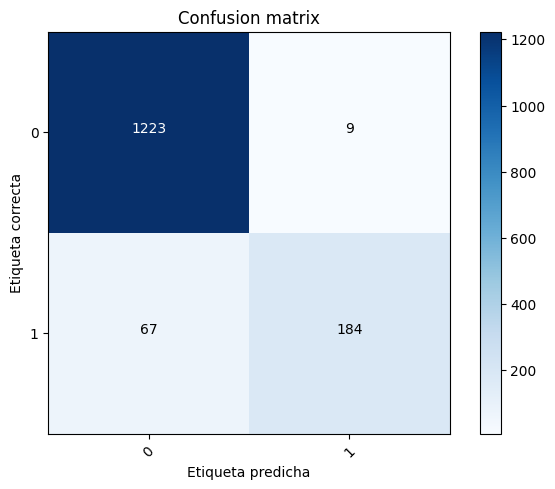

In [ ]:
plot_confusion_matrix(train.conf_matrix, ['0', '1'])